GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs

  | Name            | Type             | Params | Mode 
-------------------------------------------------------------
0 | criterion       | MSELoss          | 0      | train
1 | train_criterion | MSELoss          | 0      | train
2 | val_criterion   | MSELoss          | 0      | train
3 | train_metrics   | MetricCollection | 0      | train
4 | val_metrics     | MetricCollection | 0      | train
5 | res_blocks      | ModuleList       | 166    | train
-------------------------------------------------------------
166       Trainable params
0         Non-trainable params
166       Total params
0.001     Total estimated model params size (MB)
23        Modules in train mode
0         Modules in eval mode


Training: |          | 0/? [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_epochs=100` reached.
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs


Predicting: |          | 0/? [00:00<?, ?it/s]

<Axes: xlabel='Month'>

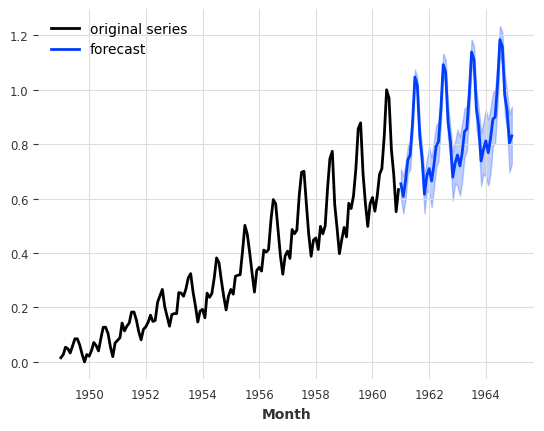

In [2]:
from darts.datasets import AirPassengersDataset, MonthlyMilkDataset
from darts.dataprocessing.transformers import Scaler
from darts.models import TCNModel
from darts.utils.likelihood_models import LaplaceLikelihood as LL

# This example demonstrates how to use the TCN model with multiple time series
air = AirPassengersDataset().load()
milk = MonthlyMilkDataset().load()
scaler_air, scaler_milk = Scaler(), Scaler()
air_s = scaler_air.fit_transform(air)
milk_s = scaler_milk.fit_transform(milk)
model = TCNModel(input_chunk_length=24,output_chunk_length=12,likelihood=LL())
model.fit([air_s, milk_s], epochs=100)
pred = model.predict(n=48, series=air_s,num_samples=500)

air_s.plot(label='original series')
pred.plot(low_quantile=.1, high_quantile=.9, label='forecast')